In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'employee_performance.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary of the dataset
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_ID        1010 non-null   object 
 1   Date               1010 non-null   object 
 2   Department         1010 non-null   object 
 3   Job_Role           1010 non-null   object 
 4   Hours_Worked       1000 non-null   float64
 5   Tasks_Completed    1010 non-null   int64  
 6   Performance_Score  1010 non-null   float64
 7   Tasks_Per_Hour     1010 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 63.3+ KB


(  Employee_ID        Date Department    Job_Role  Hours_Worked  \
 0      E00001  2023-01-01  Marketing     Manager           5.1   
 1      E00002  2023-01-02         HR  Consultant           9.3   
 2      E00003  2023-01-03    Finance   Developer           5.8   
 3      E00004  2023-01-04    Finance  Technician           6.4   
 4      E00005  2023-01-05  Marketing     Analyst           4.5   
 
    Tasks_Completed  Performance_Score  Tasks_Per_Hour  
 0               19               3.90            3.73  
 1                8               2.95            0.86  
 2                6               2.32            1.03  
 3               15               1.51            2.34  
 4                3               3.62            0.67  ,
 None)

In [2]:
# Calculate the mean of 'Hours_Worked' column excluding missing values
mean_hours_worked = data['Hours_Worked'].mean()

# Fill missing values in 'Hours_Worked' with the mean
data['Hours_Worked'] = data['Hours_Worked'].fillna(mean_hours_worked)

# Verify if there are no more missing values in 'Hours_Worked'
data['Hours_Worked'].isnull().sum(), data.head()



(0,
   Employee_ID        Date Department    Job_Role  Hours_Worked  \
 0      E00001  2023-01-01  Marketing     Manager           5.1   
 1      E00002  2023-01-02         HR  Consultant           9.3   
 2      E00003  2023-01-03    Finance   Developer           5.8   
 3      E00004  2023-01-04    Finance  Technician           6.4   
 4      E00005  2023-01-05  Marketing     Analyst           4.5   
 
    Tasks_Completed  Performance_Score  Tasks_Per_Hour  
 0               19               3.90            3.73  
 1                8               2.95            0.86  
 2                6               2.32            1.03  
 3               15               1.51            2.34  
 4                3               3.62            0.67  )

In [3]:
# Check for duplicates in the dataset
duplicates = data.duplicated().sum()
print(duplicates)


10


In [5]:
# Remove duplicate rows if any exist
data_cleaned = data.drop_duplicates()
print(data_cleaned)


    Employee_ID        Date   Department    Job_Role  Hours_Worked  \
0        E00001  2023-01-01    Marketing     Manager           5.1   
1        E00002  2023-01-02           HR  Consultant           9.3   
2        E00003  2023-01-03      Finance   Developer           5.8   
3        E00004  2023-01-04      Finance  Technician           6.4   
4        E00005  2023-01-05    Marketing     Analyst           4.5   
..          ...         ...          ...         ...           ...   
995      E00996  2025-09-22           HR     Analyst           7.9   
996      E00997  2025-09-23      Finance   Developer           7.0   
997      E00998  2025-09-24  Engineering  Consultant           8.4   
998      E00999  2025-09-25        Sales     Analyst           4.8   
999      E01000  2025-09-26        Sales     Analyst           7.8   

     Tasks_Completed  Performance_Score  Tasks_Per_Hour  
0                 19               3.90            3.73  
1                  8               2.95    

In [7]:
# Display the number of duplicates found and the shape of the dataset after removal
duplicates, data_cleaned.shape

(10, (1000, 8))

In [8]:
# Convert the 'Date' column to a datetime object

# Use .loc to update the 'Date' column to avoid warnings
data_cleaned.loc[:, 'Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')


# Check for any other columns with incorrect data types or conversion issues
data_cleaned.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_ID        1000 non-null   object 
 1   Date               1000 non-null   object 
 2   Department         1000 non-null   object 
 3   Job_Role           1000 non-null   object 
 4   Hours_Worked       1000 non-null   float64
 5   Tasks_Completed    1000 non-null   int64  
 6   Performance_Score  1000 non-null   float64
 7   Tasks_Per_Hour     1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 70.3+ KB


In [9]:
# Display the first few rows to understand the structure
data.head(), data.describe()


(  Employee_ID        Date Department    Job_Role  Hours_Worked  \
 0      E00001  2023-01-01  Marketing     Manager           5.1   
 1      E00002  2023-01-02         HR  Consultant           9.3   
 2      E00003  2023-01-03    Finance   Developer           5.8   
 3      E00004  2023-01-04    Finance  Technician           6.4   
 4      E00005  2023-01-05  Marketing     Analyst           4.5   
 
    Tasks_Completed  Performance_Score  Tasks_Per_Hour  
 0               19               3.90            3.73  
 1                8               2.95            0.86  
 2                6               2.32            1.03  
 3               15               1.51            2.34  
 4                3               3.62            0.67  ,
        Hours_Worked  Tasks_Completed  Performance_Score  Tasks_Per_Hour
 count   1010.000000      1010.000000        1010.000000     1010.000000
 mean       8.017700        10.486139           2.931485        1.435307
 std        2.331441         5.820

In [10]:
# Calculate the interquartile range (IQR) for Tasks_Per_Hour
q1 = data['Tasks_Per_Hour'].quantile(0.25)
q3 = data['Tasks_Per_Hour'].quantile(0.75)
iqr = q3 - q1
print(iqr)

1.3199999999999998


In [11]:
# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [12]:
# Flag employees with abnormally high or low Tasks_Per_Hour
data['Flagged'] = (
    (data['Tasks_Per_Hour'] < lower_bound) |
    (data['Tasks_Per_Hour'] > upper_bound)
)

In [18]:
# Count the number of flagged employees and show their data
flagged = data[data['Flagged']]
len(flagged), flagged.head()

(19,
     Employee_ID        Date   Department    Job_Role  Hours_Worked  \
 103      E00104  2023-04-14  Engineering  Consultant           4.3   
 112      E00113  2023-04-23  Engineering  Consultant           4.1   
 152      E00153  2023-06-02  Engineering  Consultant           4.4   
 153      E00154  2023-06-03  Engineering     Analyst           4.1   
 238      E00239  2023-08-27  Engineering     Analyst           4.7   
 
      Tasks_Completed  Performance_Score  Tasks_Per_Hour  Flagged  
 103               19               2.41            4.42     True  
 112               17               3.57            4.15     True  
 152               19               1.73            4.32     True  
 153               19               3.64            4.63     True  
 238               20               2.35            4.26     True  )

In [13]:
#Task 2: Data Transformation and Aggregation (12 Marks)

# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])


In [15]:
# Extract Year and Month into new columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month


In [16]:
# Display the first few rows to confirm the new columns
data[['Date', 'Year', 'Month']].head()

,Date,Year,Month
0,2023-01-01,2023,1
1,2023-01-02,2023,1
2,2023-01-03,2023,1
3,2023-01-04,2023,1
4,2023-01-05,2023,1


In [25]:
# Calculate the average performance score for each department
average_performance_by_department = (
    data.groupby('Department')['Performance_Score']
    .mean()
    .sort_values(ascending=False)
)

# Display the results
average_performance_by_department


Department
HR             3.011878
Engineering    2.944106
Sales          2.935305
Finance        2.929848
Marketing      2.847820
Name: Performance_Score, dtype: float64

In [28]:
#Identify top 3 job roles with highest average tasks completed per day

data['Tasks_Per_Day'] = data['Tasks_Completed'] / data['Hours_Worked']

# Calculate tasks per day

top_job_roles = data.groupby('Job_Role')['Tasks_Per_Day'].mean().nlargest(3).reset_index()

#Calculate total tasks completed by employees in each department

total_tasks_per_department = data.groupby('Department')['Tasks_Completed'].sum().reset_index()

# Display results
print("Average Performance Score by Department:")
print(average_performance)

print("\nTop 3 Job Roles with Highest Average Tasks Completed Per Day:")
print(top_job_roles)

print("\nTotal Tasks Completed by Each Department:")
print(total_tasks_per_department)


Average Performance Score by Department:
    Department  Performance_Score
0  Engineering           2.944106
1      Finance           2.929848
2           HR           3.011878
3    Marketing           2.847820
4        Sales           2.935305

Top 3 Job Roles with Highest Average Tasks Completed Per Day:
    Job_Role  Tasks_Per_Day
0    Analyst       1.519160
1  Developer       1.433675
2    Manager       1.410239

Total Tasks Completed by Each Department:
    Department  Tasks_Completed
0  Engineering             2348
1      Finance             2017
2           HR             1851
3    Marketing             2188
4        Sales             2187


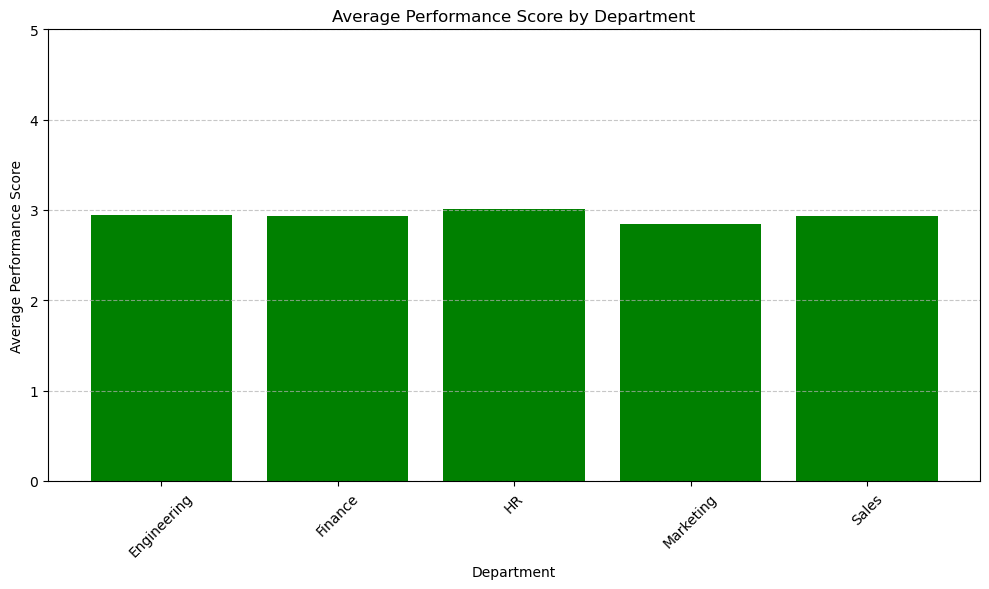

In [47]:
import matplotlib.pyplot as plt

# Calculate average performance score for each department
average_performance = data.groupby('Department')['Performance_Score'].mean().reset_index()

# Create a bar chart for average performance score by department
plt.figure(figsize=(10, 6))
plt.bar(average_performance['Department'], average_performance['Performance_Score'], color='green')
plt.title('Average Performance Score by Department')
plt.xlabel('Department')
plt.ylabel('Average Performance Score')
plt.xticks(rotation=45)
plt.ylim(0, 5)  # Assuming performance scores range from 0 to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


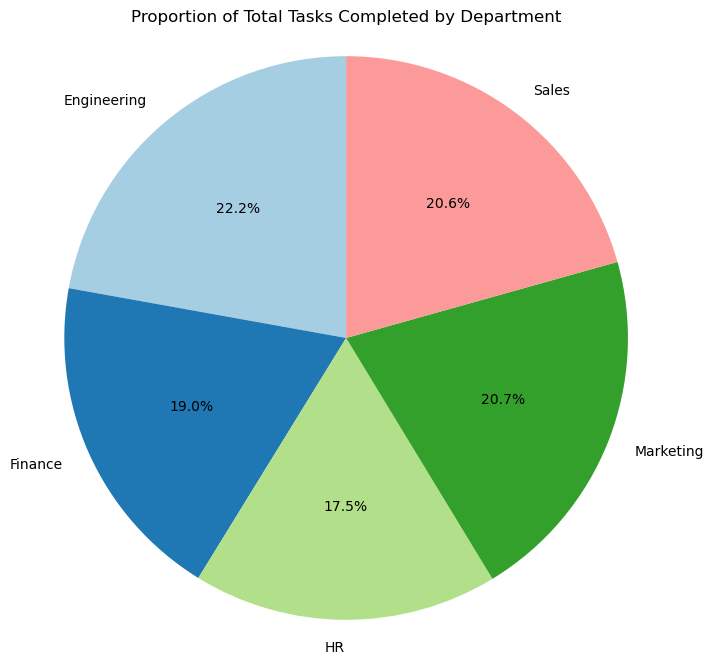

In [48]:
# Load the dataset from the provided file

# Calculate total tasks completed by each department
total_tasks_per_department = data.groupby('Department')['Tasks_Completed'].sum().reset_index()

# Create a pie chart for proportion of total tasks completed by department
plt.figure(figsize=(8, 8))
plt.pie(total_tasks_per_department['Tasks_Completed'], 
        labels=total_tasks_per_department['Department'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors)
plt.title('Proportion of Total Tasks Completed by Department')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


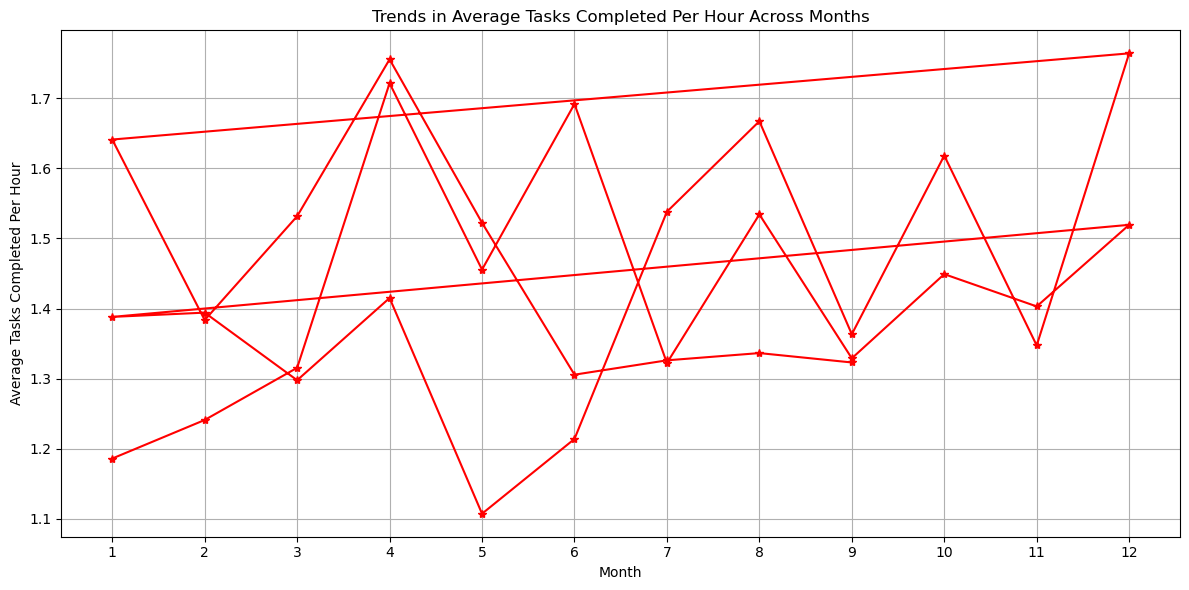

In [49]:
# Load the dataset from the provided file

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract Year and Month for grouping
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Calculate average tasks completed per hour across months
average_tasks_per_hour = data.groupby(['Year', 'Month'])['Tasks_Per_Hour'].mean().reset_index()

# Create a line graph for trends in average tasks completed per hour across months
plt.figure(figsize=(12, 6))
plt.plot(average_tasks_per_hour['Month'], average_tasks_per_hour['Tasks_Per_Hour'], marker='*', linestyle='-', color='r')

# Adding titles and labels
plt.title('Trends in Average Tasks Completed Per Hour Across Months')
plt.xlabel('Month')
plt.ylabel('Average Tasks Completed Per Hour')
plt.xticks(range(1, 13))  # Ensure all months are shown
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()
